###### GPR-FedSense 实验：Baseline vs Full

本 Notebook 运行两个实验：
1. **Baseline**: 纯 FedDWA（不使用 FedVLS 和 FedDecorr）
2. **GPR-FedSense**: FedDWA + FedVLS + FedDecorr

实验设置：
- 数据集：GPR Custom
- 模型：MobileViT-S
- Non-IID 类型：Type-8 (病态分割)
- 客户端参与率：60% (困难模式)
- 全局轮次：50

In [1]:
# ============================================
# Cell 1: 环境准备
# ============================================
import os
import shutil

# 1. 复制代码到工作目录
if not os.path.exists('/kaggle/working/FedDWA'):
    shutil.copytree('/kaggle/input/feddwa-codev5-2/FedDWA-main', '/kaggle/working/FedDWA')
    print("✓ 代码已复制到工作目录")

# 2. 切换工作目录
os.chdir('/kaggle/working/FedDWA')
print(f"✓ 当前工作目录: {os.getcwd()}")

# 3. 安装依赖
!pip install -q -r requirements.txt
print("✓ 依赖安装完成")

✓ 代码已复制到工作目录
✓ 当前工作目录: /kaggle/working/FedDWA
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 2.1 MB/s eta 0:00:00

In [ ]:
# ============================================
# Cell 2: 修复依赖冲突 & 安装 CLIP
# ============================================
print("正在清理冲突的包...")
!pip uninstall -y numpy scipy opencv-python opencv-contrib-python opencv-python-headless 2>/dev/null || true

print("\n安装兼容版本的核心库...")
!pip install --quiet \
    numpy==1.26.4 \
    scipy==1.11.4 \
    matplotlib==3.7.5 \
    opencv-python==4.8.1.78 \
    albumentations \
    tensorboardX \
    thop \
    seaborn \
    scikit-learn

print("\n安装 CLIP...")
!pip install --quiet git+https://github.com/openai/CLIP.git

print("✓ 依赖安装完成")

正在清理冲突的包...
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
Found existing installation: opencv-python 4.8.1.78
Uninstalling opencv-python-4.8.1.78:
  Successfully uninstalled opencv-python-4.8.1.78
Found existing installation: opencv-contrib-python 4.12.0.88
Uninstalling opencv-contrib-python-4.12.0.88:
  Successfully uninstalled opencv-contrib-python-4.12.0.88
Found existing installation: opencv-python-headless 4.11.0.86
Uninstalling opencv-python-headless-4.11.0.86:
  Successfully uninstalled opencv-python-headless-4.11.0.86

安装兼容版本的核心库...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 110.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour

In [ ]:
# ============================================
# Cell 3: 实验 1 - Baseline (不使用 FedSense)
# ============================================
print("\n" + "="*60)
print("实验 1: Baseline (FedDWA Only)")
print("="*60 + "\n")

!python main.py \
    --dataset gpr_custom \
    --data_dir /kaggle/input/data-oll/data \
    --model mobilevit_s \
    --alg feddwa \
    --client_num 5 \
    --client_frac 1.0 \
    --Tg 50 \
    --E 3 \
    --B 64 \
    --lr 0.001 \
    --non_iidtype 9 \
    --alpha_dir 0.1 \
    --device gpu \
    --seed 42

# 保存基线结果
print("\n保存 Baseline 结果...")
!mkdir -p /kaggle/working/results
!cp -r logs_feddwa /kaggle/working/results/logs_baseline
!cp feddwa_analysis_result.png /kaggle/working/results/baseline_result.png 2>/dev/null || true
!cp *.csv /kaggle/working/results/baseline_results.csv 2>/dev/null || true
!cp -r confusion_matrix_* /kaggle/working/results/baseline_confusion/ 2>/dev/null || true
!cp -r client_confusion_matrices /kaggle/working/results/baseline_client_confusion/ 2>/dev/null || true
print("✓ Baseline 结果已保存")


实验 1: Baseline (FedDWA Only)

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotate

In [ ]:
# ============================================
# Cell 4: 实验 2 - GPR-FedSense (完整版)
# ============================================
print("\n" + "="*60)
print("实验 2: GPR-FedSense (FedVLS + FedDecorr)")
print("="*60 + "\n")

!python main.py \
    --dataset gpr_custom \
    --data_dir /kaggle/input/data-oll/data \
    --model mobilevit_s \
    --alg feddwa \
    --client_num 5 \
    --client_frac 1.0 \
    --Tg 50 \
    --E 3 \
    --B 64 \
    --lr 0.001 \
    --non_iidtype 9 \
    --alpha_dir 0.1 \
    --device gpu \
    --seed 42 \
    --use_fedvls --fedvls_alpha 1.0 \
    --use_feddecorr --feddecorr_beta 0.1

# 保存 FedSense 结果
print("\n保存 GPR-FedSense 结果...")
!cp -r logs_feddwa /kaggle/working/results/logs_fedsense
!cp feddwa_analysis_result.png /kaggle/working/results/fedsense_result.png 2>/dev/null || true
!cp *.csv /kaggle/working/results/fedsense_results.csv 2>/dev/null || true
!cp -r confusion_matrix_* /kaggle/working/results/fedsense_confusion/ 2>/dev/null || true
!cp -r client_confusion_matrices /kaggle/working/results/fedsense_client_confusion/ 2>/dev/null || true
print("✓ GPR-FedSense 结果已保存")


实验 2: GPR-FedSense (FedVLS + FedDecorr)

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because a

In [ ]:
# ============================================
# Cell 4.5: 实验 3 - FedCLIP (新模型)
# ============================================
print("\n" + "="*60)
print("实验 3: FedCLIP (Frozen Backbone + Adapter)")
print("="*60 + "\n")

# 注意: Batch Size 设为 64 以防止 Kaggle GPU OOM (ViT-B/32 输入为 224x224)
!python main.py \
    --dataset gpr_custom \
    --data_dir /kaggle/input/data-oll/data \
    --model fedclip \
    --alg feddwa \
    --client_num 5 \
    --client_frac 1.0 \
    --Tg 50 \
    --E 3 \
    --B 64 \
    --lr 0.001 \
    --non_iidtype 9 \
    --alpha_dir 0.1 \
    --device gpu \
    --seed 42

# 保存 FedCLIP 结果
print("\n保存 FedCLIP 结果...")
!cp -r logs_feddwa /kaggle/working/results/logs_fedclip
!cp feddwa_analysis_result.png /kaggle/working/results/fedclip_result.png 2>/dev/null || true
!cp *.csv /kaggle/working/results/fedclip_results.csv 2>/dev/null || true
!cp -r confusion_matrix_* /kaggle/working/results/fedclip_confusion/ 2>/dev/null || true
!cp -r client_confusion_matrices /kaggle/working/results/fedclip_client_confusion/ 2>/dev/null || true
print("✓ FedCLIP 结果已保存")

In [ ]:
# ============================================
# Cell 5: 结果对比可视化（包含 FedCLIP）
# ============================================
import sys
sys.path.append('/kaggle/working/FedDWA')

from utils.plot_utils import plot_comparison
from IPython.display import Image, display

print("\n" + "="*60)
print("生成对比图 (Baseline vs FedSense vs FedCLIP)...")
print("="*60 + "\n")

# 使用新的 plot_comparison 函数
plot_comparison(
    log_dirs=[
        '/kaggle/working/results/logs_baseline',
        '/kaggle/working/results/logs_fedsense',
        '/kaggle/working/results/logs_fedclip'
    ],
    labels=['Baseline (FedDWA)', 'GPR-FedSense', 'FedCLIP'],
    save_path='/kaggle/working/results/comparison_result.png',
    colors=['#3498db', '#e74c3c', '#2ecc71'],
    title='GPR-FedSense & FedCLIP Performance Comparison'
)

print("\n✓ 对比图已生成")


生成对比图...

Loading log from: /kaggle/working/results/logs_baseline/gpr_custom_feddwa_model=mobilevit_s_dwaToopK=5_next=1_C=1.0_Tg=50_N=5_lr=0.001_E=3_noniid=9_nType=4_ratio=0.8_alpha=0.1_42_1.json
Loading log from: /kaggle/working/results/logs_fedsense/gpr_custom_feddwa_model=mobilevit_s_dwaToopK=5_next=1_C=1.0_Tg=50_N=5_lr=0.001_E=3_noniid=9_nType=4_ratio=0.8_alpha=0.1_42_1.json


/kaggle/working/FedDWA/utils/plot_utils.py:178: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(valid_labels, rotation=45, ha='right')


Comparison plot saved to: /kaggle/working/results/comparison_result.png

GPR-FedSense Performance Comparison
Baseline (FedDWA)             : 0.0595 (5.95%)
GPR-FedSense                  : 0.0595 (5.95%)

GPR-FedSense vs Baseline (FedDWA):
  Absolute improvement: +0.0000
  Relative improvement: +0.00%


✓ 对比图已生成



实验结果可视化


📊 实验对比图:


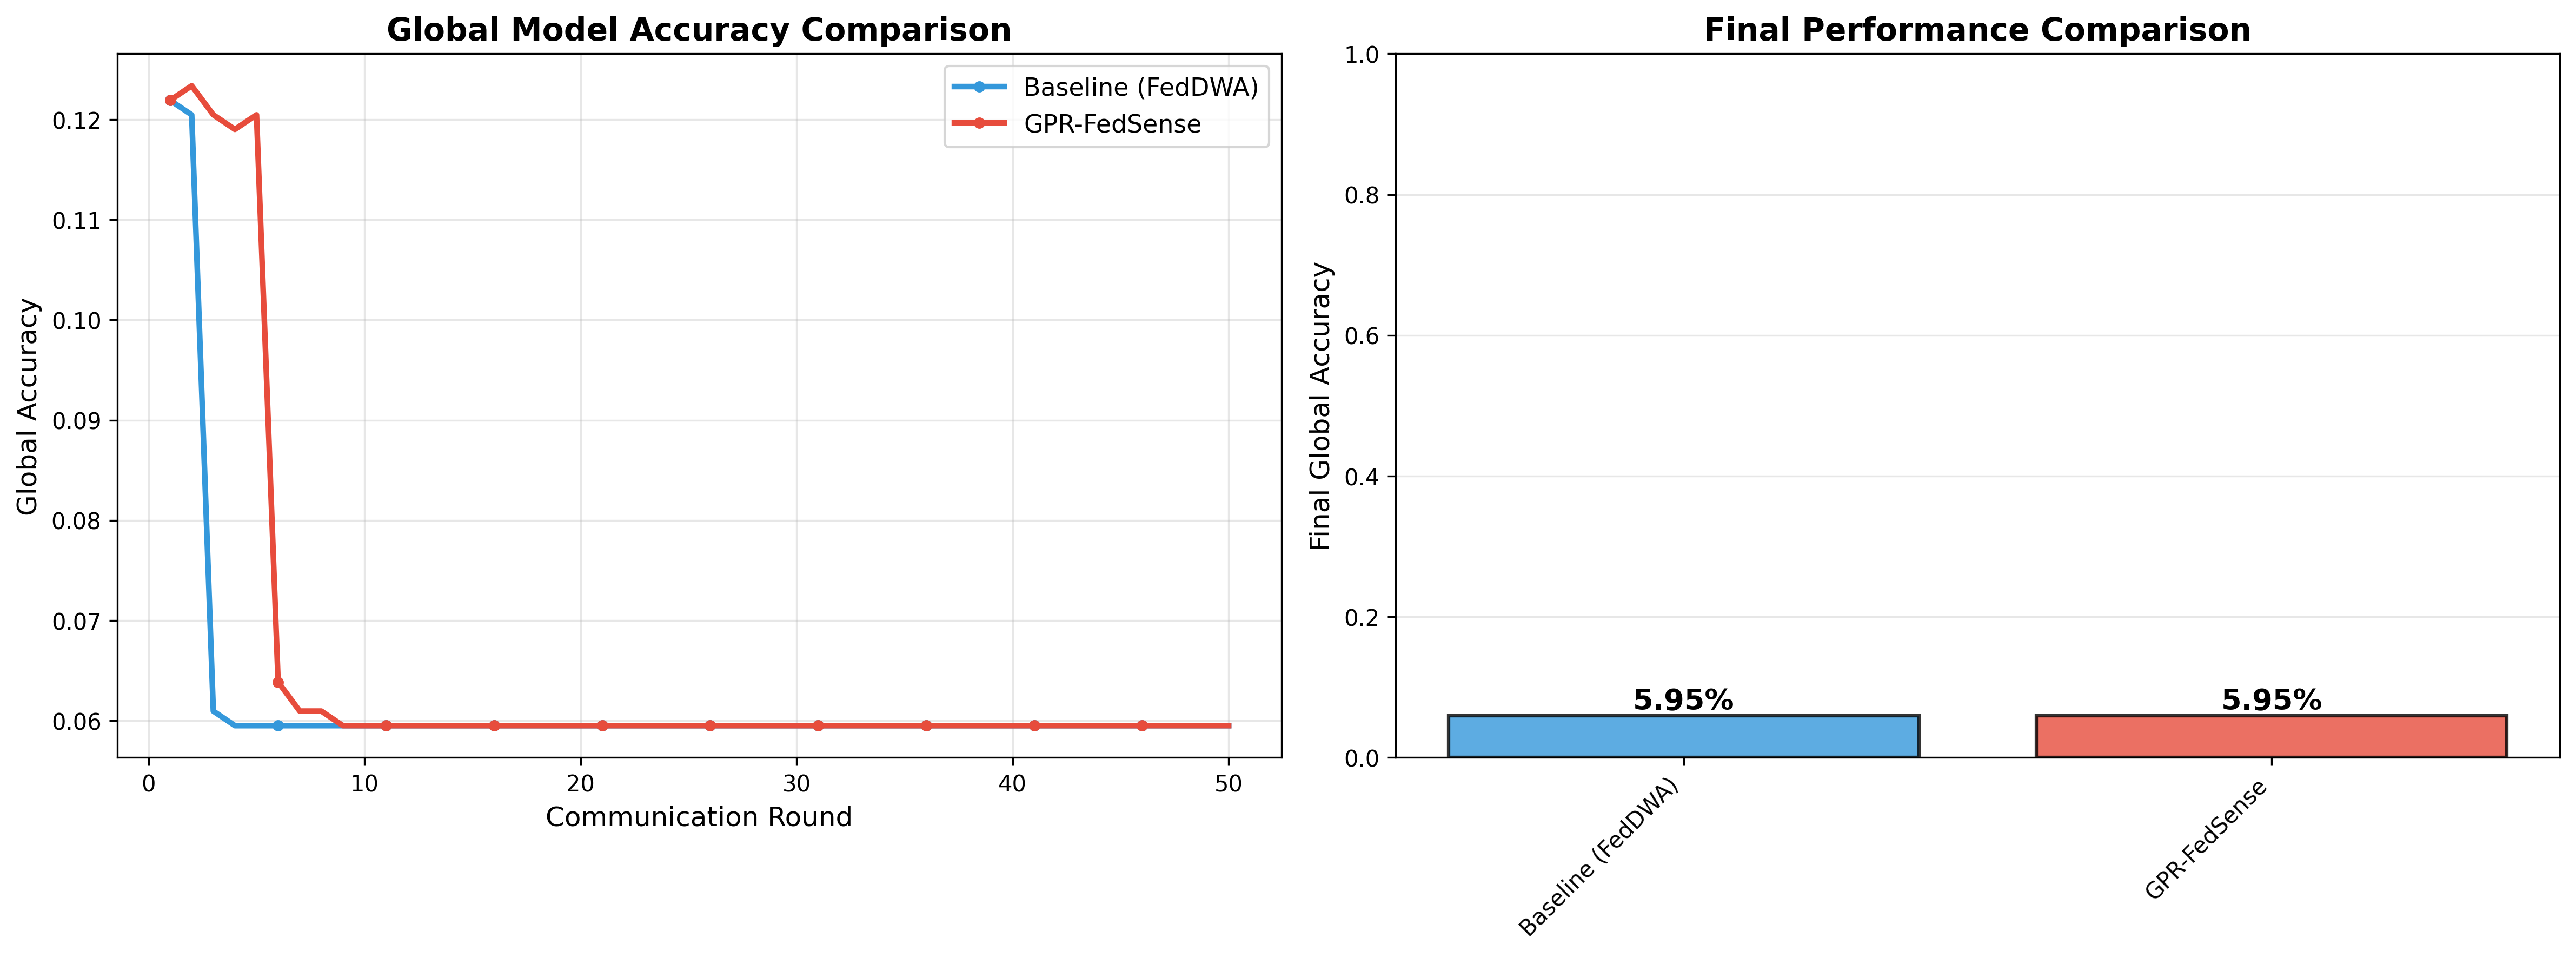


📈 Baseline 训练曲线:


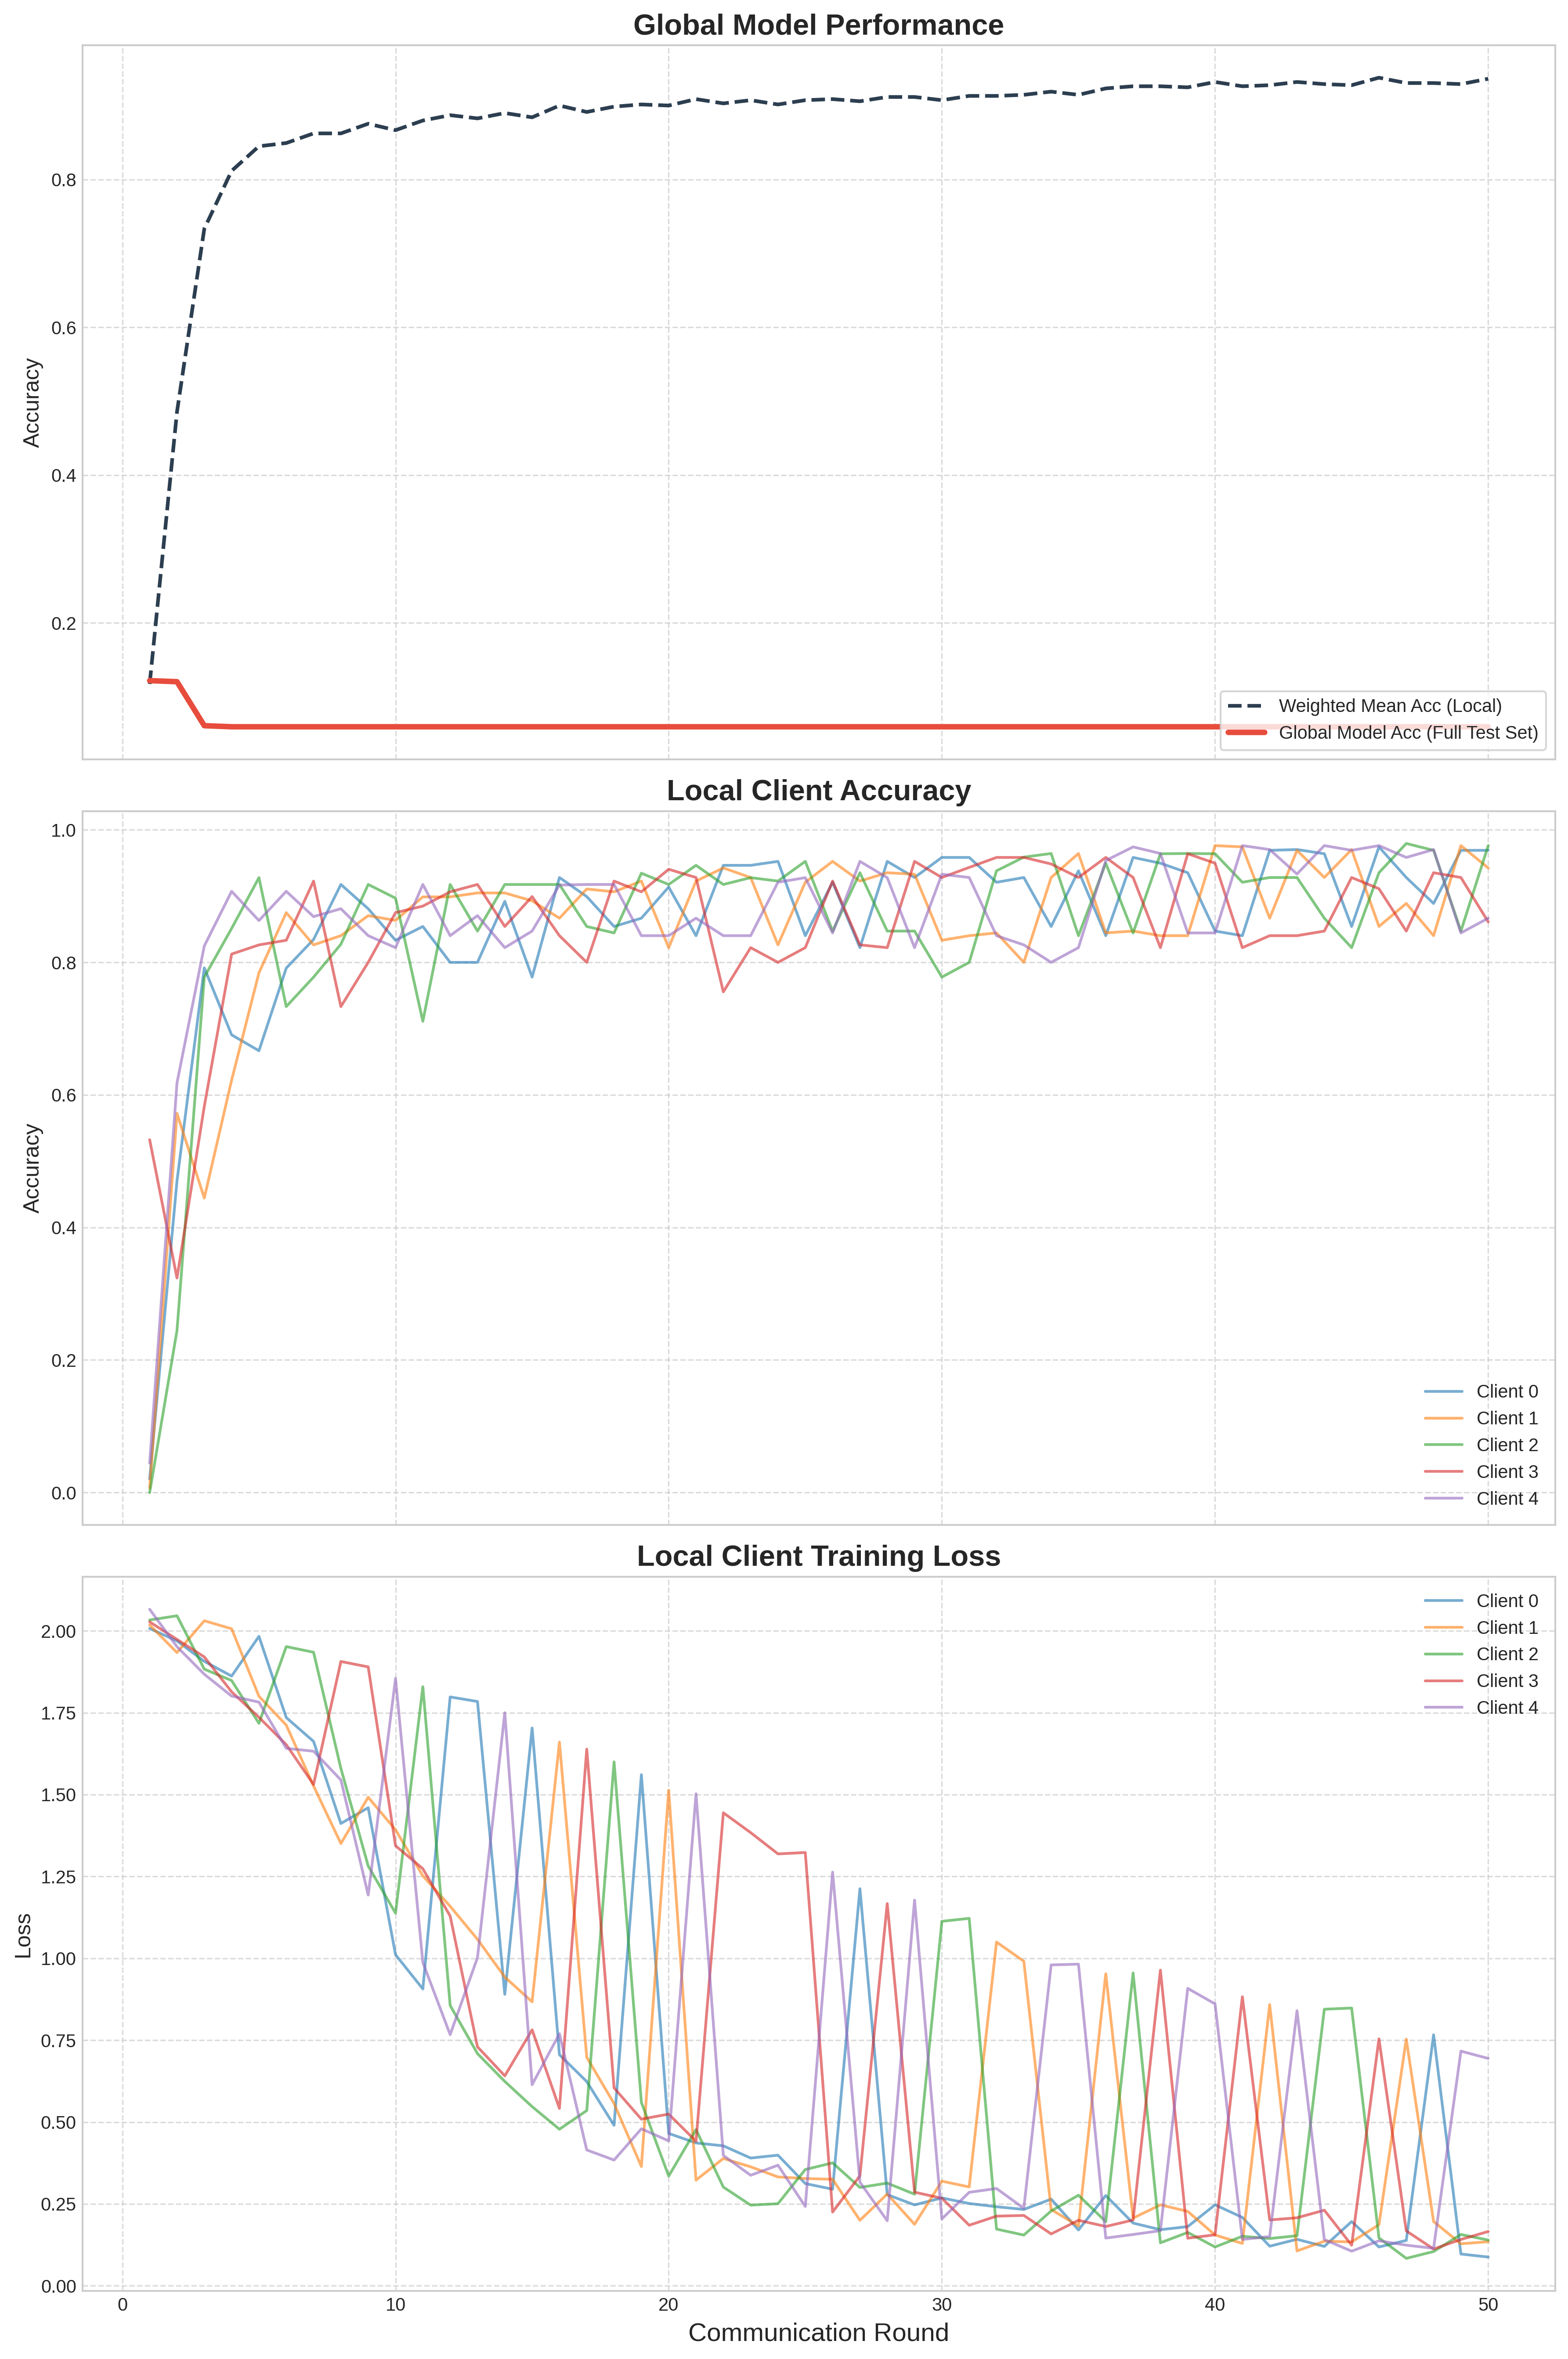


📈 GPR-FedSense 训练曲线:


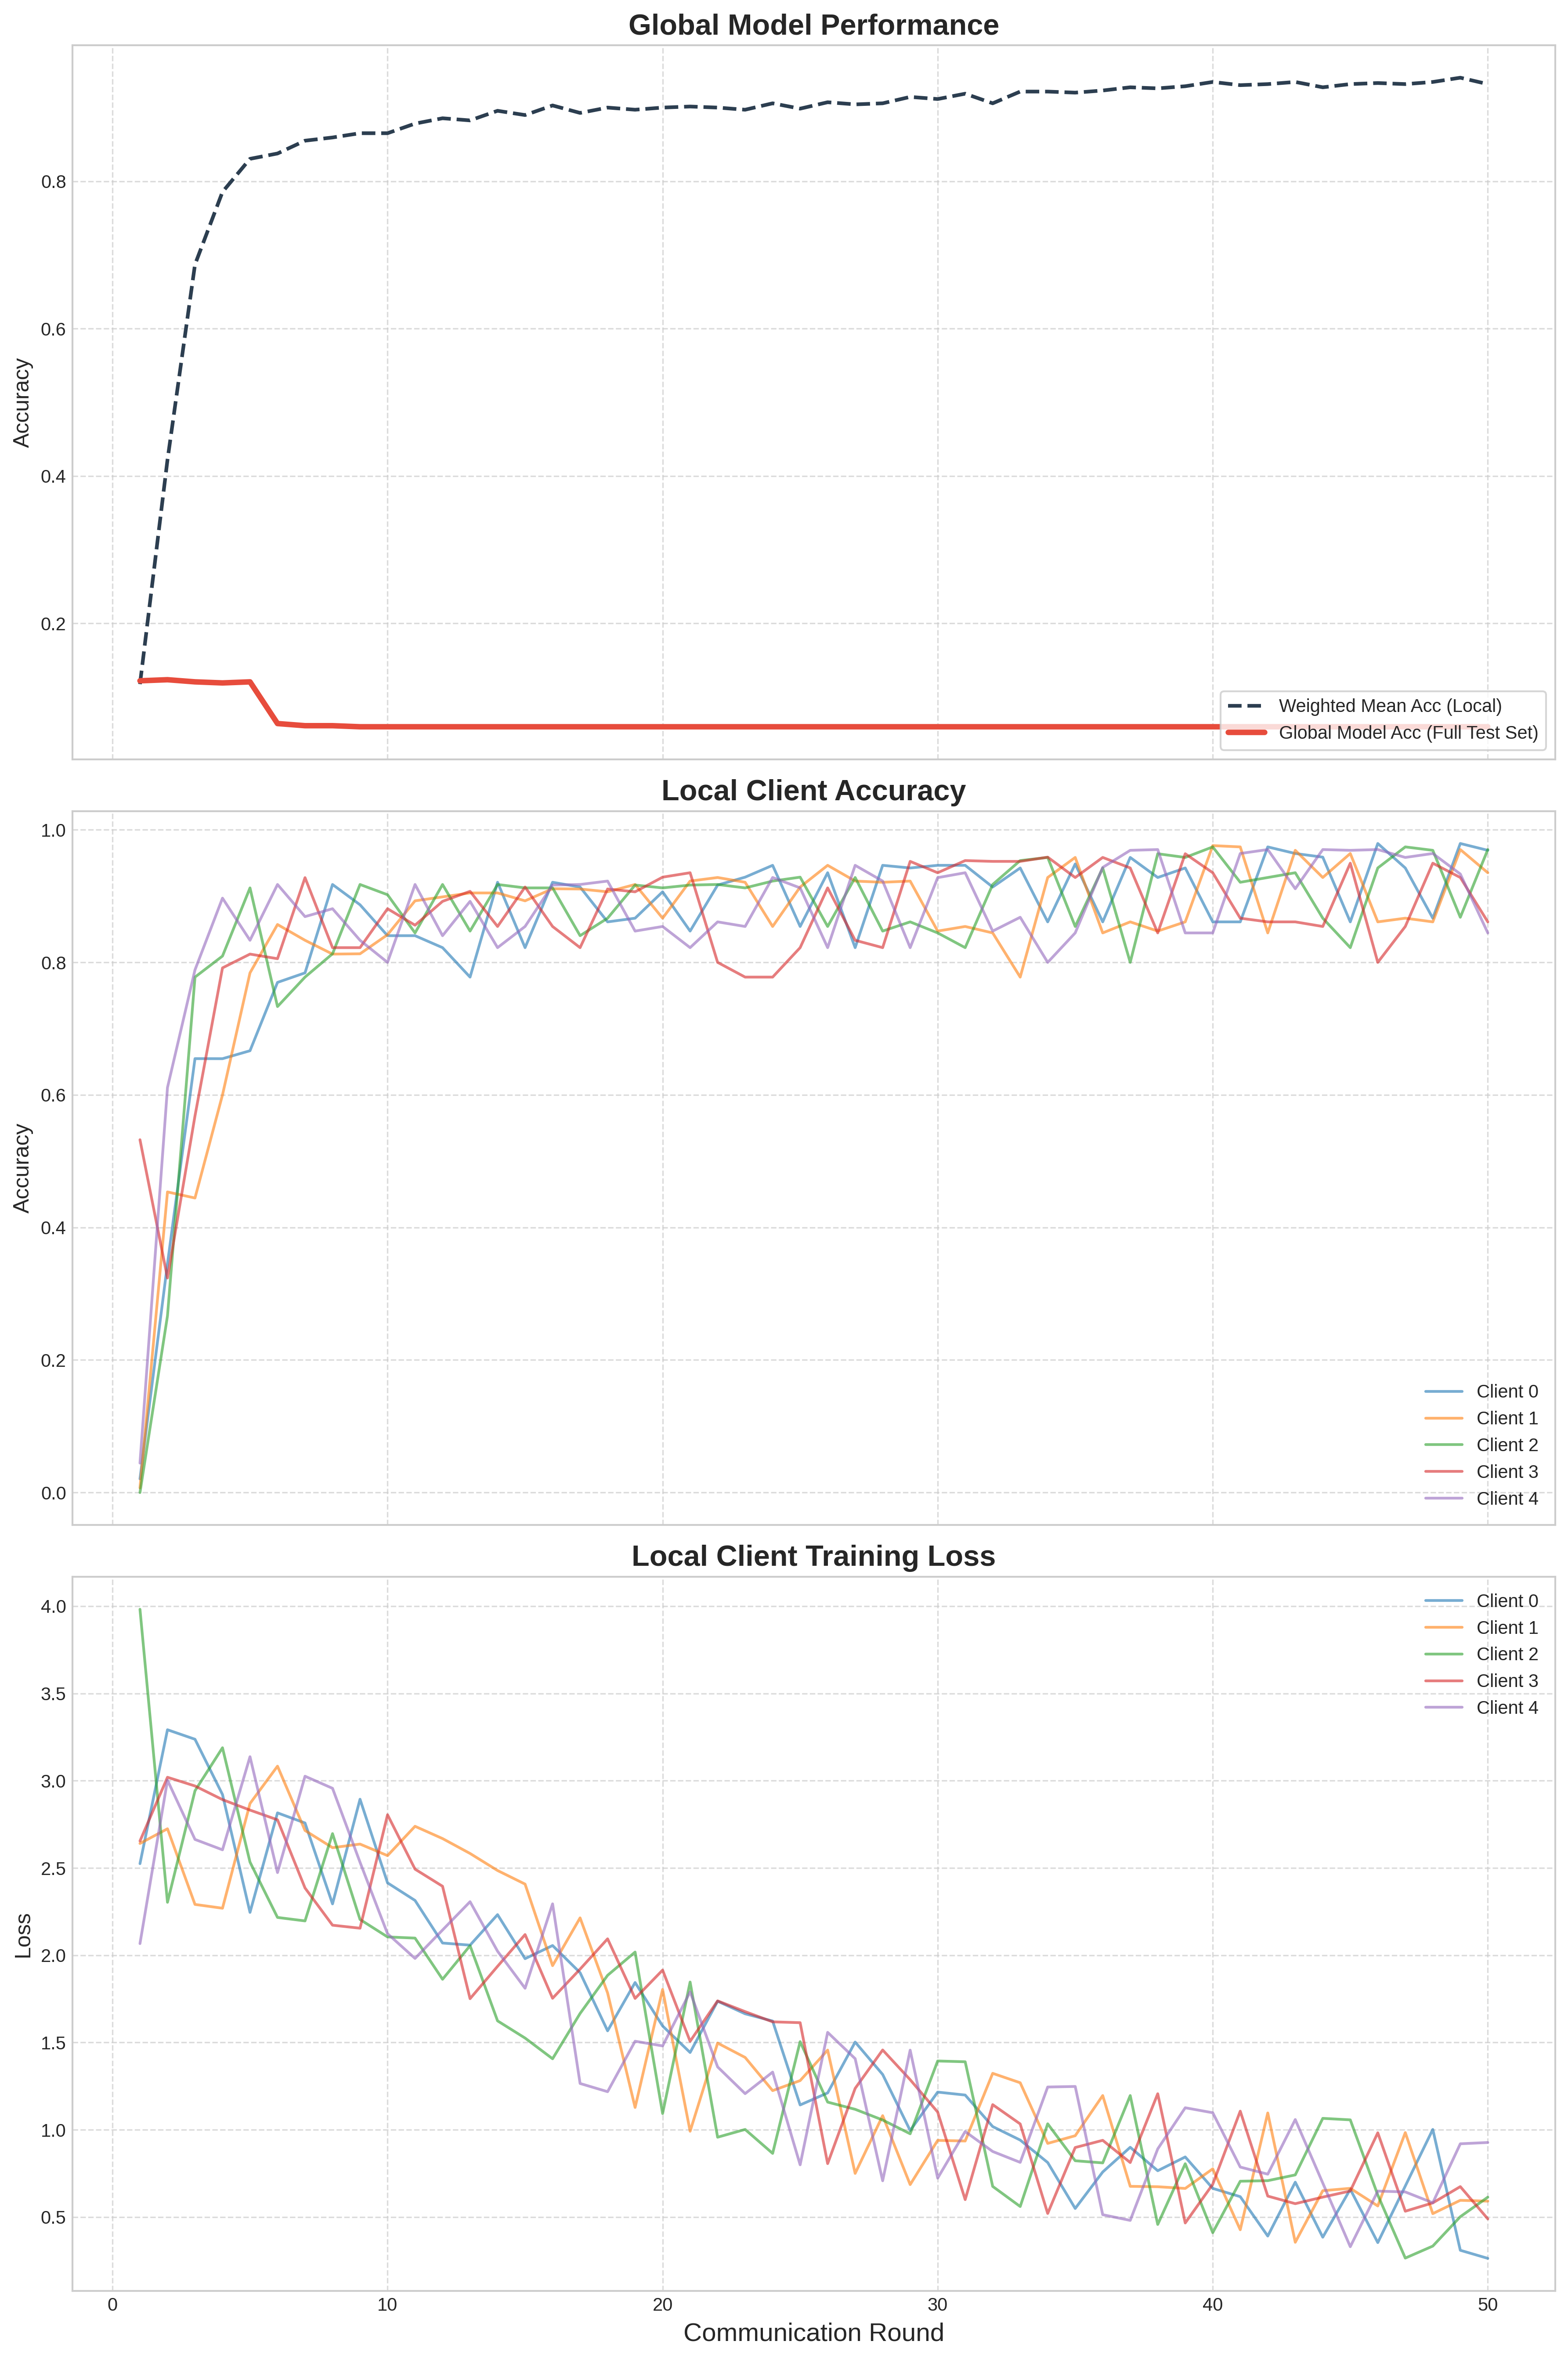


🔍 全局混淆矩阵对比:

Baseline:

GPR-FedSense:

✓ 所有结果已显示


In [7]:
# ============================================
# Cell 6: 显示所有结果
# ============================================
from IPython.display import Image, display
import os

print("\n" + "="*60)
print("实验结果可视化")
print("="*60 + "\n")

# 1. 对比图（最重要）
print("\n📊 实验对比图:")
if os.path.exists('/kaggle/working/results/comparison_result.png'):
    display(Image(filename='/kaggle/working/results/comparison_result.png'))
else:
    print("❌ 未找到对比图")

# 2. Baseline 训练曲线
print("\n📈 Baseline 训练曲线:")
if os.path.exists('/kaggle/working/results/baseline_result.png'):
    display(Image(filename='/kaggle/working/results/baseline_result.png'))
else:
    print("❌ 未找到 Baseline 训练曲线")

# 3. GPR-FedSense 训练曲线
print("\n📈 GPR-FedSense 训练曲线:")
if os.path.exists('/kaggle/working/results/fedsense_result.png'):
    display(Image(filename='/kaggle/working/results/fedsense_result.png'))
else:
    print("❌ 未找到 GPR-FedSense 训练曲线")

# 4. 全局混淆矩阵对比
print("\n🔍 全局混淆矩阵对比:")
print("\nBaseline:")
baseline_cm = '/kaggle/working/results/baseline_confusion/confusion_matrix_global.png'
if os.path.exists(baseline_cm):
    display(Image(filename=baseline_cm))

print("\nGPR-FedSense:")
fedsense_cm = '/kaggle/working/results/fedsense_confusion/confusion_matrix_global.png'
if os.path.exists(fedsense_cm):
    display(Image(filename=fedsense_cm))

print("\n✓ 所有结果已显示")

In [8]:
# ============================================
# Cell 7: 下载结果文件（可选）
# ============================================
print("\n" + "="*60)
print("结果文件列表")
print("="*60 + "\n")

!ls -lh /kaggle/working/results/

print("\n提示: 您可以在 Kaggle 的 Output 标签页下载以下文件:")
print("  - comparison_result.png (对比图)")
print("  - baseline_results.csv (基线数据)")
print("  - fedsense_results.csv (FedSense 数据)")
print("  - logs_baseline/ (基线日志)")
print("  - logs_fedsense/ (FedSense 日志)")


结果文件列表

total 2.7M
-rw-r--r-- 1 root root 1.3M Nov 27 06:42 baseline_result.png
-rw-r--r-- 1 root root 248K Nov 27 08:49 comparison_result.png
-rw-r--r-- 1 root root 1.2M Nov 27 08:49 fedsense_result.png
drwxr-xr-x 3 root root 4.0K Nov 27 06:42 logs_baseline
drwxr-xr-x 3 root root 4.0K Nov 27 08:49 logs_fedsense

提示: 您可以在 Kaggle 的 Output 标签页下载以下文件:
  - comparison_result.png (对比图)
  - baseline_results.csv (基线数据)
  - fedsense_results.csv (FedSense 数据)
  - logs_baseline/ (基线日志)
  - logs_fedsense/ (FedSense 日志)
